Importamos CSV

In [2]:
import pandas as pd


nombre_documento = r'df_tourist_python_sprint2.csv'
df= pd.read_csv(nombre_documento, sep=';', decimal='.')

df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.0,1.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,...,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,2020-01-10
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,2019-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,Espectacular habitaci�n,NaN,238089984,Sant Antoni,Eixample,Private room,1,1.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,88.0,spain,barcelona,2019-10-16
7689,32392774,? Tu Hogar de Lujo ????? en el Centro de Sevilla,"Exclusivo, amplio y luminoso alojamiento situa...",243246681,Arenal,Casco Antiguo,Entire home/apt,6,2.0,3.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,157.0,spain,sevilla,2021-01-31
7690,32395123,Rooms by G Bella Mar�a 3,The 2-star Bella Maria has 24-hourreception an...,159933359,Felanitx,NaN,Entire home/apt,2,1.0,1.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,mallorca,2019-04-24
7691,32407332,LUMINOSO Y ENCANTADOR PISO CERCA DE TODO,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,187631805,Proven�als del Poblenou,Sant Mart�,Private room,3,2.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,389.0,spain,barcelona,2019-08-12


Verificamos tipo de datos importados 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7693 entries, 0 to 7692
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 7693 non-null   int64  
 1   name                         7690 non-null   object 
 2   description                  7643 non-null   object 
 3   host_id                      7693 non-null   int64  
 4   neighbourhood_name           7693 non-null   object 
 5   neighbourhood_district       4669 non-null   object 
 6   room_type                    7693 non-null   object 
 7   accommodates                 7693 non-null   int64  
 8   bathrooms                    7693 non-null   float64
 9   bedrooms                     7693 non-null   float64
 10  beds                         7693 non-null   float64
 11  amenities_list               7677 non-null   object 
 12  price                        7693 non-null   float64
 13  minimum_nights    

# Sprint 2:

## KPI

Tasa de Ocupación Mensual

In [3]:

total_disponibilidad = df['availability_30'].sum() #Sumamos la disponibilidad total
total_filas = len(df) #Número total de filas
dias_totales = 30 * total_filas #Días totales disponibles

tasa_ocupacion = (dias_totales - total_disponibilidad) / dias_totales

print(f"Tasa de Ocupación Mensual: {tasa_ocupacion:.2%}") #Resultado con 2 decimales y en porcentaje

Tasa de Ocupación Mensual: 58.65%


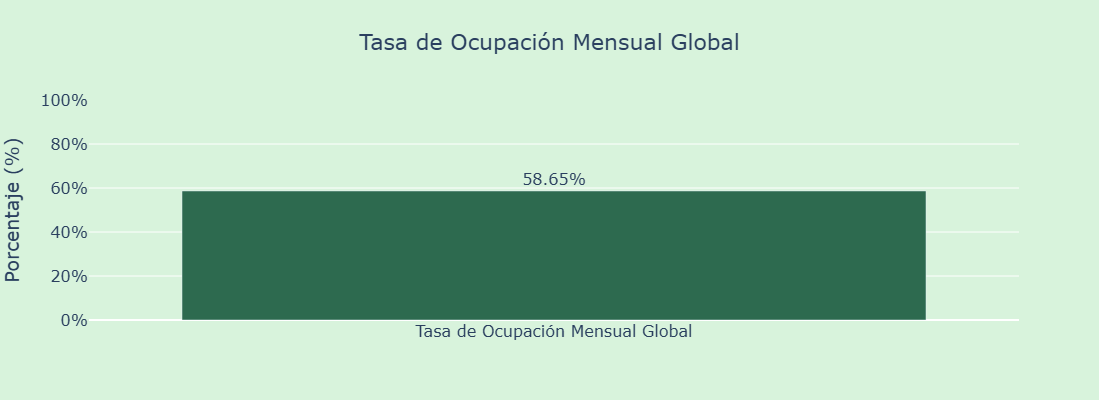

In [ ]:
import plotly.graph_objects as go

# Cálculo de la tasa de ocupación mensual global
total_disponibilidad = df['availability_30'].sum()
total_filas = len(df)
dias_totales = 30 * total_filas

tasa_ocupacion = (dias_totales - total_disponibilidad) / dias_totales * 100  # en %

# Crear figura con Plotly
fig = go.Figure(go.Bar(
    x=['Tasa de Ocupación Mensual Global'],  # texto alargado para buena visibilidad
    y=[tasa_ocupacion],
    marker_color='#2D6A4F',  # verde oscuro
    text=[f"{tasa_ocupacion:.2f}%"],
    textposition='outside'
))

# Layout
fig.update_layout(
    title='Tasa de Ocupación Mensual Global',
    title_x=0.5,
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC',
    yaxis=dict(
        title='Porcentaje (%)',
        range=[0, 100],
        ticksuffix='%'
    ),
    xaxis=dict(title=''),
    font=dict(size=16),
    height=400,
    width=600,
)

fig.show()



Crear columnas ocupación 30/60/90/365

In [ ]:
for period in [30, 60, 90, 365]:
    column_name = f'occupied_days_{period}'
    availability_col = f'availability_{period}'
    
    if availability_col in df.columns:
        df[column_name] = period - df[availability_col]

df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,occupied_days_30,occupied_days_60,occupied_days_90,occupied_days_365
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.0,1.0,...,100.0,FALSO,75.0,spain,malaga,2018-07-31,23,40,50,235
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,...,90.0,FALSO,52.0,spain,madrid,2020-01-10,30,60,90,203
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,...,100.0,VERDADERO,142.0,spain,sevilla,2019-07-29,4,29,59,95
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,...,90.0,VERDADERO,306.0,spain,barcelona,2020-01-10,21,37,41,65
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.0,2.0,...,100.0,FALSO,39.0,spain,girona,2019-02-19,30,41,41,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,Espectacular habitaci�n,NaN,238089984,Sant Antoni,Eixample,Private room,1,1.0,1.0,...,90.0,VERDADERO,88.0,spain,barcelona,2019-10-16,2,2,2,2
7689,32392774,? Tu Hogar de Lujo ????? en el Centro de Sevilla,"Exclusivo, amplio y luminoso alojamiento situa...",243246681,Arenal,Casco Antiguo,Entire home/apt,6,2.0,3.0,...,100.0,FALSO,157.0,spain,sevilla,2021-01-31,30,49,49,324
7690,32395123,Rooms by G Bella Mar�a 3,The 2-star Bella Maria has 24-hourreception an...,159933359,Felanitx,NaN,Entire home/apt,2,1.0,1.0,...,90.0,VERDADERO,25.0,spain,mallorca,2019-04-24,7,7,7,181
7691,32407332,LUMINOSO Y ENCANTADOR PISO CERCA DE TODO,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,187631805,Proven�als del Poblenou,Sant Mart�,Private room,3,2.0,2.0,...,100.0,VERDADERO,389.0,spain,barcelona,2019-08-12,29,43,50,50


Crear columna tasa de ocupación 

In [ ]:
# Crear columnas de tasa de ocupación para 30, 60, 90, 365 días
for period in [30, 60, 90, 365]:
    availability_col = f'availability_{period}'
    occupied_col = f'occupied_days_{period}'
    occupancy_rate_col = f'occupancy_rate_%_{period}'
    
    if availability_col in df.columns:
        # Calcular la tasa de ocupación en porcentaje
        df[occupancy_rate_col] = ((df[occupied_col] / period) * 100).round(2)

df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,city,insert_date,occupied_days_30,occupied_days_60,occupied_days_90,occupied_days_365,occupancy_rate_%_30,occupancy_rate_%_60,occupancy_rate_%_90,occupancy_rate_%_365
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.0,1.0,...,malaga,2018-07-31,23,40,50,235,76.67,66.67,55.56,64.38
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,...,madrid,2020-01-10,30,60,90,203,100.00,100.00,100.00,55.62
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,...,sevilla,2019-07-29,4,29,59,95,13.33,48.33,65.56,26.03
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,...,barcelona,2020-01-10,21,37,41,65,70.00,61.67,45.56,17.81
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.0,2.0,...,girona,2019-02-19,30,41,41,53,100.00,68.33,45.56,14.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,Espectacular habitaci�n,NaN,238089984,Sant Antoni,Eixample,Private room,1,1.0,1.0,...,barcelona,2019-10-16,2,2,2,2,6.67,3.33,2.22,0.55
7689,32392774,? Tu Hogar de Lujo ????? en el Centro de Sevilla,"Exclusivo, amplio y luminoso alojamiento situa...",243246681,Arenal,Casco Antiguo,Entire home/apt,6,2.0,3.0,...,sevilla,2021-01-31,30,49,49,324,100.00,81.67,54.44,88.77
7690,32395123,Rooms by G Bella Mar�a 3,The 2-star Bella Maria has 24-hourreception an...,159933359,Felanitx,NaN,Entire home/apt,2,1.0,1.0,...,mallorca,2019-04-24,7,7,7,181,23.33,11.67,7.78,49.59
7691,32407332,LUMINOSO Y ENCANTADOR PISO CERCA DE TODO,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,187631805,Proven�als del Poblenou,Sant Mart�,Private room,3,2.0,2.0,...,barcelona,2019-08-12,29,43,50,50,96.67,71.67,55.56,13.70


Ciudad con Mayor Ocupación Mensual

In [ ]:
df.groupby('city')['occupancy_rate_%_30'].mean().round(2).nlargest(1).reset_index()

,city,occupancy_rate_%_30
0,madrid,64.13


In [ ]:
import plotly.graph_objects as go

# Cálculo de la ciudad con mayor ocupación mensual
top_ciudad = df.groupby('city')['occupancy_rate_%_30'].mean().round(2).nlargest(1).reset_index()
nombre_ciudad = top_ciudad.loc[0, 'city']
ocupacion = top_ciudad.loc[0, 'occupancy_rate_%_30']

# Crear figura con nombre largo para evitar que la barra parezca pequeña
fig = go.Figure(go.Bar(
    x=[ nombre_ciudad],  # alargar el texto para mejor visibilidad
    y=[ocupacion],
    marker_color='#2D6A4F',  # verde oscuro
    text=[f"{ocupacion:.2f}%"],
    textposition='outside'
))

# Layout
fig.update_layout(
    title='Ciudad con Mayor Ocupación Mensual',
    title_x=0.5,
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC',
    yaxis=dict(
        title='Porcentaje (%)',
        range=[0, 100],
        ticksuffix='%'
    ),
    xaxis=dict(title=''),
    font=dict(size=16),
    height=400,
    width=600,
)

fig.show()


Indice de satisfacción general

In [ ]:
#Media de review scores rating
indice_satisfaccion = round(df['review_scores_rating'].mean(), 2)

print(f"Índice de Satisfacción: {indice_satisfaccion}")

Índice de Satisfacción: 92.42


In [ ]:
import plotly.graph_objects as go

# Cálculo del índice de satisfacción
indice_satisfaccion = round(df['review_scores_rating'].mean(), 2)

# Crear gráfico
fig = go.Figure(go.Bar(
    x=["Índice de Satisfacción"],
    y=[indice_satisfaccion],
    marker_color='#2D6A4F',
    text=[indice_satisfaccion],
    textposition='outside'
))

# Personalizar diseño
fig.update_layout(
    title="Índice de Satisfacción General (sobre 100)",
    title_x=0.5,
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC',
    yaxis=dict(
        title='Puntuación',
        range=[0, 110]  # Aumentamos para que no se corte
    ),
    xaxis=dict(title=''),
    font=dict(size=16),
    height=500,  # Más alto
    width=600
)

fig.show()


Item con mayor satisfacción promedio

In [ ]:
#Se crea una columna con la media de las 5 diferentes puntuaciones de cada apartamento,
df["satisfaccion"] = df[[
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_checkin"
]].mean(axis=1)

# Nos quedamos con el valor más alto,
top_row = df.loc[df["satisfaccion"].idxmax()]

formatted_output = f"{top_row['name']} - {top_row['satisfaccion']:.1f}"

print(formatted_output)


A ROOM WITH A VIEW - 100.0


In [ ]:
import plotly.graph_objects as go

# Calcular satisfacción media por ítem
df["satisfaccion"] = df[[
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_checkin"
]].mean(axis=1)

# Obtener fila con mayor satisfacción
top_row = df.loc[df["satisfaccion"].idxmax()]
item_name = top_row['name']
satisfaccion_score = round(top_row['satisfaccion'], 1)

# Gráfico
fig = go.Figure(go.Bar(
    x=[item_name],
    y=[satisfaccion_score],
    marker_color='#2D6A4F',
    text=[f"{satisfaccion_score}"],
    textposition='outside',
    textfont=dict(size=20, color='black')  # Tamaño del número
))

# Layout
fig.update_layout(
    title="Item con Mayor Satisfacción Promedio",
    title_x=0.5,
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC',
    yaxis=dict(
        title='Puntuación',
        range=[0, 100]
    ),
    xaxis=dict(
        title='',
        tickfont=dict(size=18),  # Tamaño del nombre del ítem
    ),
    font=dict(size=16),
    height=500,
    width=900
)

fig.show()


## Análisis orientado (Marketing)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.express as px

# Creamos una tabla con las columnas que nos interesa y el sumatorio de amenities por apartamento
df["amstr"] =  df['amenities_list'].astype(str)
separador = df["amstr"].str.count(",") + 1
separador.name = "comoditats"
df_amenities = pd.concat([df, separador], axis=1)
df_amenities[["city","neighbourhood_name","accommodates","price","comoditats", "review_scores_rating"]]

,city,neighbourhood_name,accommodates,price,comoditats,review_scores_rating
0,malaga,Centro,2,400.0,19,97.0
1,madrid,C�rmenes,1,170.0,31,92.0
2,sevilla,San Vicente,4,990.0,34,98.0
3,barcelona,l'Antiga Esquerra de l'Eixample,2,400.0,27,94.0
4,girona,Quart,5,900.0,43,97.0
...,...,...,...,...,...,...
7688,barcelona,Sant Antoni,1,3000.0,12,94.0
7689,sevilla,Arenal,6,2090.0,27,100.0
7690,mallorca,Felanitx,2,930.0,9,96.0
7691,barcelona,Proven�als del Poblenou,3,960.0,30,98.0


In [ ]:
# Variables a analizar
variables = ["comoditats", "accommodates", "review_scores_rating"]

# Creamos un dicionario con los coeficientes
coef_dict = {}

for city in df_amenities["city"].unique():
    df_city = df_amenities[df_amenities["city"] == city]
    X = df_city[variables]
    y = df_city["price"]
    model = LinearRegression()
    model.fit(X, y)
    coef_dict[city] = model.coef_

# Pasamos a dataframe para graficar
coef_df = pd.DataFrame(coef_dict, index=variables).T
coef_df.index.name = "city"
coef_df.reset_index(inplace=True)
print(coef_df)

        city  comoditats  accommodates  review_scores_rating
0     malaga   -1.939746    119.896710              9.495328
1     madrid    0.174631    158.945914              4.696413
2    sevilla  -10.590584    161.142812              2.819347
3  barcelona    4.206476    198.740101              1.728008
4     girona   -1.305960    181.173952              6.110821
5   valencia   -5.203859    134.966354              8.262263
6   mallorca    0.431811    161.181196              7.115337
7    menorca   -1.689679    238.252356              4.634617


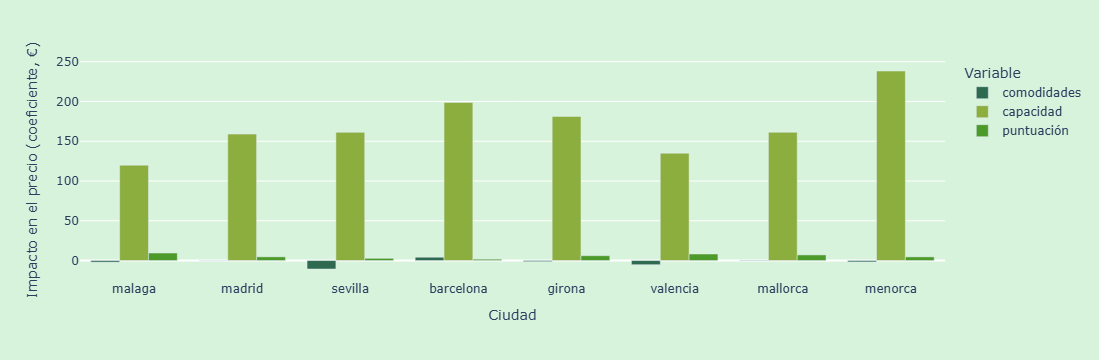

In [ ]:
# Formato Plotly
coef_long = coef_df.melt(id_vars='city', var_name='Variable', value_name='Impacte')

# Renombramos las variables
rename_dict = {
    'comoditats': 'comodidades',
    'accommodates': 'capacidad',
    'review_scores_rating': 'puntuación'
}
coef_long['Variable'] = coef_long['Variable'].replace(rename_dict)

colors = {
    'comodidades': '#2D6A4F', 'capacidad': '#8BAE3F', 'puntuación': '#4C9A2A'}

# Grafico de barras agrupadas
fig = px.bar(coef_long, x='city', y='Impacte', color='Variable', color_discrete_map=colors, barmode='group')

# Colores del fondo
fig.update_layout(
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC',
    yaxis_title='Impacto en el precio (coeficiente, €)',
    xaxis_title='Ciudad',
    legend_title_text='Variable'
)

fig.show()

## Análisis orientado a experiencia usuario (Usuario)

## Transformación dataset df_tourist_python_sprint2 para crear df_cl y responder la pregunta de negocio

In [5]:
# Creación dataset:
df_cl = df[['apartment_id','room_type','accommodates','bathrooms','bedrooms','beds','price',
                    'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication','review_scores_location','reviews_per_month','city']]

# Visualiza el dataset:
df_cl

,apartment_id,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,city
0,11964,Private room,2,2.0,1.0,1.0,400.0,78,97.0,100.0,100.0,100.0,100.0,100.0,75.0,malaga
1,21853,Private room,1,1.0,1.0,1.0,170.0,33,92.0,90.0,90.0,100.0,100.0,80.0,52.0,madrid
2,32347,Entire home/apt,4,1.0,2.0,2.0,990.0,148,98.0,100.0,100.0,100.0,100.0,100.0,142.0,sevilla
3,35379,Private room,2,2.0,1.0,1.0,400.0,292,94.0,100.0,90.0,100.0,100.0,100.0,306.0,barcelona
4,35801,Private room,5,1.0,2.0,5.0,900.0,36,97.0,100.0,100.0,100.0,100.0,100.0,39.0,girona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,Private room,1,1.0,1.0,1.0,3000.0,0,94.0,100.0,90.0,100.0,100.0,100.0,88.0,barcelona
7689,32392774,Entire home/apt,6,2.0,3.0,4.0,2090.0,36,100.0,100.0,100.0,100.0,100.0,100.0,157.0,sevilla
7690,32395123,Entire home/apt,2,1.0,1.0,2.0,930.0,0,96.0,100.0,100.0,100.0,100.0,100.0,25.0,mallorca
7691,32407332,Private room,3,2.0,2.0,2.0,960.0,21,98.0,100.0,100.0,100.0,100.0,100.0,389.0,barcelona


###Analista de experiencia del cliente:
¿Qué aspectos (precisión de los detalles, limpieza, check-in o comunicación) presentan mayores diferencias entre los alojamientos mejor y peor valorados en la puntuación general?


In [6]:
# Entre el 10% de alojamientos con mejor y peor valoración general

import plotly.graph_objects as go

# Eliminar valores faltantes en las columnas relevantes
cols = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication'
]
df = df_cl[cols].dropna()

# Definir percentiles para dividir los grupos
q75 = df['review_scores_rating'].quantile(0.75)
q25 = df['review_scores_rating'].quantile(0.25)

# Agrupar datos
high = df[df['review_scores_rating'] >= q75]
low = df[df['review_scores_rating'] <= q25]

# Calcular promedios
mean_high = high.iloc[:, 1:].mean()
mean_low = low.iloc[:, 1:].mean()

# Crear etiquetas más legibles para el eje X
aspects = mean_high.index.str.replace('review_scores_', '').str.capitalize()

# Crear gráfico de barras doble
fig = go.Figure(data=[
    go.Bar(
        name='Alta puntuación',
        x=aspects,
        y=mean_high.values,
        marker_color='#8BAE3F'  # Verde lima
    ),
    go.Bar(
        name='Baja puntuación',
        x=aspects,
        y=mean_low.values,
        marker_color='#2D6A4F'  # Verde bosque oscuro
    )
])

# Configuración del diseño del gráfico
fig.update_layout(
    title='Comparación de aspectos entre alojamientos mejor y peor valorados',
    xaxis_title='Aspecto de la experiencia del cliente',
    yaxis_title='Puntuación promedio',
    barmode='group',
    template='plotly_white',
    font=dict(size=14)
)
fig.update_layout(paper_bgcolor="#D8F3DC")
fig.show()

In [7]:

#Análisis comparativo de diferencias en aspectos clave de la experiencia del cliente entre alojamientos mejor y peor valorados según percentiles 90 y 10


# Seleccionamos solo las columnas que nos interesan
cols = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication'
]
df = df_cl[cols].dropna()

# Definimos los umbrales alto y bajo para la puntuación general
high_threshold = df['review_scores_rating'].quantile(0.75)  # Percentil 75
low_threshold = df['review_scores_rating'].quantile(0.25)   # Percentil 25

# Dividimos el DataFrame en dos grupos: los mejores y los peores según la puntuación general
top = df[df['review_scores_rating'] >= high_threshold]
bottom = df[df['review_scores_rating'] <= low_threshold]

# Calculamos la media de las puntuaciones de diferentes aspectos de la experiencia para cada grupo
aspects = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication']
top_means = top[aspects].mean()
bottom_means = bottom[aspects].mean()

# Calculamos las diferencias de puntuación media entre el grupo superior e inferior
differences = (top_means - bottom_means).sort_values()

# Creamos un gráfico de barras horizontal con Plotly para mostrar las diferencias
fig = go.Figure(go.Bar(
    x=differences.values,
    y=differences.index,
    orientation='h',
    marker=dict(
        color='#8BAE3F'  # Color verde lima
    )
))

# Configuramos el diseño del gráfico
fig.update_layout(
    title='Diferencias en aspectos de la experiencia del cliente\nentre los alojamientos mejor y peor valorados',
    xaxis_title='Diferencia en la puntuación media (Mejor - Peor)',
    yaxis_title='Aspectos',
    plot_bgcolor='white',
    font=dict(size=14),
    xaxis=dict(showgrid=True, gridcolor='#2D6A4F'),  # Verde oscuro para la grilla
    yaxis=dict(showgrid=False),
    height=400
)

fig.update_layout(paper_bgcolor="#D8F3DC")
fig.show()


## Análisis orientado a negocio (Operaciones)

# Quin impacte té l'opció de reservar automàticament 
# (sense revisió del propietari) a la disponibilitat mitjana a cada ciutat? 

calcular impacto sobre la disponibilidad mensual de la variable is_instant_bookable



 Disponibilidad Media (30 días) por Ciudad y Reserva Automática con impacto correspondiente

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# 1. Agrupar por ciudad y reserva automática
disponibilidad_media_mensual = df.groupby(['city', 'is_instant_bookable'])['availability_30'].mean().reset_index()

# 2. Renombrar para mayor claridad
disponibilidad_media_mensual.rename(columns={'availability_30': 'mean_availability_30'}, inplace=True)

# 3. Pivot para comparación entre FALSO y VERDADERO
pivot_disponibilidad_mensual = disponibilidad_media_mensual.pivot(
    index='city', columns='is_instant_bookable', values='mean_availability_30'
)

# 4. Calcular impacto absoluto y relativo
pivot_disponibilidad_mensual['impact'] = pivot_disponibilidad_mensual['VERDADERO'] - pivot_disponibilidad_mensual['FALSO']
pivot_disponibilidad_mensual['impact_%'] = (pivot_disponibilidad_mensual['impact'] / pivot_disponibilidad_mensual['FALSO']) * 100

# 5. Redondear
pivot_disponibilidad_mensual = pivot_disponibilidad_mensual.round(2).reset_index()

# 6. Preparar datos en formato largo para gráfico
df_melted_disp = pivot_disponibilidad_mensual.melt(
    id_vars='city',
    value_vars=['FALSO', 'VERDADERO'],
    var_name='Reserva Automática',
    value_name='Disponibilidad Media'
)

# 7. Asignar colores personalizados
colores_personalizados = {
    'FALSO': '#8BAE3F',     # verde claro
    'VERDADERO': '#2D6A4F'  # verde oscuro
}

# 8. Gráfico de barras agrupadas
fig_barras = px.bar(
    df_melted_disp,
    x='city',
    y='Disponibilidad Media',
    color='Reserva Automática',
    barmode='group',
    title='Disponibilidad Media (30 días) por Ciudad y Reserva Automática',
    labels={'Disponibilidad Media': 'Disponibilidad Media (días)', 'Reserva Automática': 'Reserva Automática'},
    color_discrete_map=colores_personalizados
)

fig_barras.update_layout(
    yaxis_tickformat=".2f",
    xaxis_title='Ciudad',
    yaxis_title='Disponibilidad Media (días)',
    paper_bgcolor="#D8F3DC",
    plot_bgcolor="#D8F3DC",
    title_x=0.5
)

# 9. Tabla en formato Plotly con fondo personalizado
fig_tabla = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=["<b>Ciudad</b>", "<b>FALSO</b>", "<b>VERDADERO</b>", "<b>Impacto (días)</b>", "<b>Impacto (%)</b>"],
                fill_color="#2D6A4F",  # verde oscuro
                font=dict(color="white", size=14),
                align="center",
                height=30
            ),
            cells=dict(
                values=[
                    pivot_disponibilidad_mensual['city'],
                    pivot_disponibilidad_mensual['FALSO'],
                    pivot_disponibilidad_mensual['VERDADERO'],
                    pivot_disponibilidad_mensual['impact'],
                    pivot_disponibilidad_mensual['impact_%']
                ],
                fill_color="#D8F3DC",  # fondo verde claro
                align="center",
                height=25,
                font=dict(color="black", size=12),
                format=["", ".2f", ".2f", ".2f", ".2f"]
            )
        )
    ]
)

fig_tabla.update_layout(
    title="Tabla de Disponibilidad Media (30 días) por Ciudad y Reserva Automática",
    title_x=0.5,
    margin=dict(l=10, r=10, t=60, b=10),
    paper_bgcolor="#D8F3DC"
)

# 10. Mostrar resultados
fig_tabla.show()
fig_barras.show()


interpretación:

En Barcelona, los alojamientos sin reserva automática (FALSO) presentan una disponibilidad media de 11,42 días en los próximos 30 días.
En cambio, aquellos con reserva automática (VERDADERO) tienen una disponibilidad ligeramente menor: 11,05 días.

Esto representa un impacto negativo de -0,36 días, es decir, una disminución del 3,20% en la disponibilidad cuando se activa la opción de reserva instantánea.

📌 Esto podría indicar que los alojamientos con reserva automática tienen una mayor demanda, lo que reduce su disponibilidad.

# Disponibilidad Media (availability_30) por Ciudad, Tipo de Alojamiento y Reserva Automática con impacto correspondiente

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# 1. Agrupar por ciudad, tipo de alojamiento y reserva automática
disp_por_tipo = df.groupby(['city', 'room_type', 'is_instant_bookable'])['availability_30'].mean().reset_index()

# 2. Pivot para comparación FALSO / VERDADERO
pivot_disp_tipo = disp_por_tipo.pivot(
    index=['city', 'room_type'],
    columns='is_instant_bookable',
    values='availability_30'
).reset_index()

# 3. Calcular impacto
pivot_disp_tipo['impact'] = pivot_disp_tipo['VERDADERO'] - pivot_disp_tipo['FALSO']
pivot_disp_tipo['impact_%'] = (pivot_disp_tipo['impact'] / pivot_disp_tipo['FALSO']) * 100
pivot_disp_tipo = pivot_disp_tipo.round(2)

# 4. Crear la tabla en Plotly
fig_table = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=["<b>Ciudad</b>", "<b>Tipo de Alojamiento</b>", "<b>FALSO</b>", "<b>VERDADERO</b>", "<b>Impacto (días)</b>", "<b>Impacto (%)</b>"],
                fill_color="#2D6A4F",  # verde oscuro
                font=dict(color="white", size=13),
                align="center",
                height=30
            ),
            cells=dict(
                values=[
                    pivot_disp_tipo['city'],
                    pivot_disp_tipo['room_type'],
                    pivot_disp_tipo['FALSO'],
                    pivot_disp_tipo['VERDADERO'],
                    pivot_disp_tipo['impact'],
                    pivot_disp_tipo['impact_%']
                ],
                fill_color="#D8F3DC",  # fondo tabla verde claro
                align="center",
                height=25,
                font=dict(color="black", size=12),
                format=["", "", ".2f", ".2f", ".2f", ".2f"]
            )
        )
    ]
)

fig_table.update_layout(
    title="Disponibilidad Media (availability_30) por Ciudad, Tipo de Alojamiento y Reserva Automática",
    title_x=0.5,
    margin=dict(l=10, r=10, t=60, b=10),
    paper_bgcolor="#D8F3DC"
)

# 5. Gráfico de barras agrupadas con colores personalizados
# Reconvertir a formato largo
df_melted = disp_por_tipo.copy()
df_melted.rename(columns={
    'availability_30': 'Disponibilidad Media',
    'is_instant_bookable': 'Reserva Automática'
}, inplace=True)

# Asignar colores personalizados
colores_personalizados = {
    'FALSO': '#8BAE3F',     # verde claro
    'VERDADERO': '#2D6A4F'  # verde oscuro
}

fig_bar = px.bar(
    df_melted,
    x='city',
    y='Disponibilidad Media',
    color='Reserva Automática',
    barmode='group',
    facet_col='room_type',
    title='Disponibilidad Media (availability_30) por Ciudad, Tipo de Alojamiento y Reserva Automática',
    labels={'city': 'Ciudad', 'Disponibilidad Media': 'Disponibilidad Media (días)'},
    height=500,
    color_discrete_map=colores_personalizados
)

fig_bar.update_layout(
    yaxis_tickformat=".2f",
    xaxis_title='Ciudad',
    yaxis_title='Disponibilidad Media (días)',
    title_x=0.5,
    paper_bgcolor="#D8F3DC",
    plot_bgcolor="#D8F3DC"
)

# Mostrar ambos
fig_table.show()
fig_bar.show()


Numero de alojamientos por ciudad, room type y reserva automatica.

In [ ]:
df.groupby(['city', 'is_instant_bookable','room_type']).size().reset_index(name= 'Num_accommod')

,city,is_instant_bookable,room_type,Num_accommod
0,barcelona,FALSO,Entire home/apt,498
1,barcelona,FALSO,Hotel room,1
2,barcelona,FALSO,Private room,694
3,barcelona,FALSO,Shared room,11
4,barcelona,VERDADERO,Entire home/apt,563
5,barcelona,VERDADERO,Hotel room,12
6,barcelona,VERDADERO,Private room,473
7,barcelona,VERDADERO,Shared room,9
8,girona,FALSO,Entire home/apt,458
9,girona,FALSO,Private room,29


In [ ]:
import pandas as pd
import plotly.express as px

# Agrupar y contar número de alojamientos
df_conteo = df.groupby(['city', 'is_instant_bookable', 'room_type']).size().reset_index(name='Num_accommod')

# Mapear colores personalizados para Reserva Automática
colores_personalizados = {
    'FALSO': '#8BAE3F',     # verde claro
    'VERDADERO': '#2D6A4F'  # verde oscuro
}

# Renombrar columna para claridad en el gráfico
df_conteo.rename(columns={'is_instant_bookable': 'Reserva Automática', 'room_type': 'Tipo de Alojamiento'}, inplace=True)

# Gráfico de barras facetado por tipo de alojamiento
fig = px.bar(
    df_conteo,
    x='city',
    y='Num_accommod',
    color='Reserva Automática',
    barmode='group',
    facet_col='Tipo de Alojamiento',
    category_orders={"Reserva Automática": ['FALSO', 'VERDADERO']},
    color_discrete_map=colores_personalizados,
    title='Número de Alojamientos por Ciudad, Reserva Automática y Tipo de Alojamiento',
    labels={'city': 'Ciudad', 'Num_accommod': 'Número de Alojamientos'}
)

# Ajustes de estilo y fondo
fig.update_layout(
    paper_bgcolor="#D8F3DC",
    plot_bgcolor="#D8F3DC",
    title_x=0.5,
    yaxis_title='Número de Alojamientos'
)

# Mostrar gráfico
fig.show()
